In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

start_date = "2020-03-15"
end_date = "2025-03-15"

aapl_data = yf.download("AAPL", start=start_date, end=end_date)
msft_data = yf.download("MSFT", start=start_date, end=end_date)
tsla_data = yf.download("TSLA", start=start_date, end=end_date)
nvda_data = yf.download("NVDA", start=start_date, end=end_date)
googl_data = yf.download("GOOGL", start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
import matplotlib.pyplot as plt
# Moving average
def moving_average(df):
    ma_3 = df["Close"].rolling(window = 3).mean()
    ma_5 = df["Close"].rolling(window = 5).mean()
    ma_6 = df["Close"].rolling(window = 6).mean()
    ma_9 = df["Close"].rolling(window = 9).mean()
    ma_10 = df["Close"].rolling(window = 10).mean()
    ma_12 = df["Close"].rolling(window = 12).mean()
    ma_50 = df["Close"].rolling(window = 50).mean()
    ma_200 = df["Close"].rolling(window = 200).mean()

    # std_5 = df['Close'].rolling(window = 5).std()
    # std_10 = df['Close'].rolling(window = 10).std()
    # std_50 = df['Close'].rolling(window = 50).std()
    # std_200 = df['Close'].rolling(window = 200).std()
    
    # combined_ma = pd.concat([ma_5, ma_10, ma_50, ma_200, std_5, std_10, std_50, std_200], axis=1)
    # combined_ma.columns = ['MA_5', 'MA_10', 'MA_50', 'MA_200', 'STD_5', 'STD_10', 'STD_50', 'STD_200']

    combined_ma = pd.concat([ma_3, ma_5, ma_6, ma_9, ma_10, ma_12, ma_50, ma_200], axis=1)
    combined_ma.columns = ['MA_3', 'MA_5', 'MA_6', 'MA_9', 'MA_10', 'MA_12', 'MA_50', 'MA_200',]

    dropped = combined_ma.dropna()
    print(dropped)
    
    return dropped

aapl_comb = moving_average(aapl_data)
msft_comb = moving_average(msft_data)
tsla_comb = moving_average(tsla_data)
nvda_comb = moving_average(nvda_data)
googl_comb = moving_average(googl_data)

                  MA_3        MA_5        MA_6        MA_9       MA_10  \
Date                                                                     
2020-12-28  130.113767  128.882364  128.021819  127.066198  126.254816   
2020-12-29  131.386820  130.179524  129.358376  127.824829  127.533421   
2020-12-30  131.956609  130.538979  130.252130  128.466248  128.103862   
2020-12-31  130.654215  130.876935  130.383991  128.899284  128.580528   
2021-01-04  128.876490  130.376828  130.131655  129.197747  128.649882   
...                ...         ...         ...         ...         ...   
2025-03-10  233.960002  234.710001  235.263334  236.786667  237.812000   
2025-03-11  229.130000  231.692001  232.398333  234.617778  235.192000   
2025-03-12  221.766663  227.939999  229.240000  232.359999  232.853999   
2025-03-13  215.833328  222.809998  224.896665  228.786665  230.091998   
2025-03-14  213.383331  217.693997  221.256666  226.059999  227.256999   

                 MA_12       MA_50   

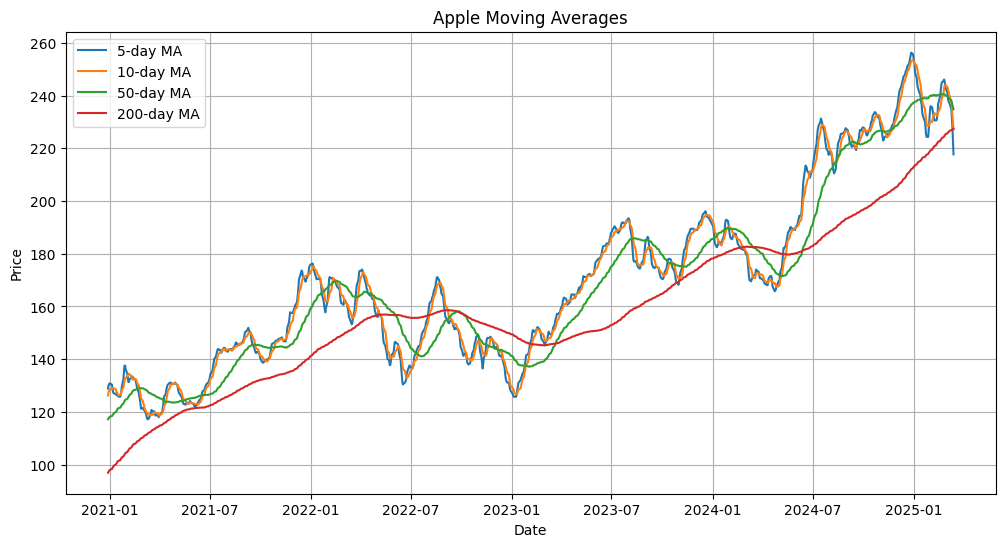

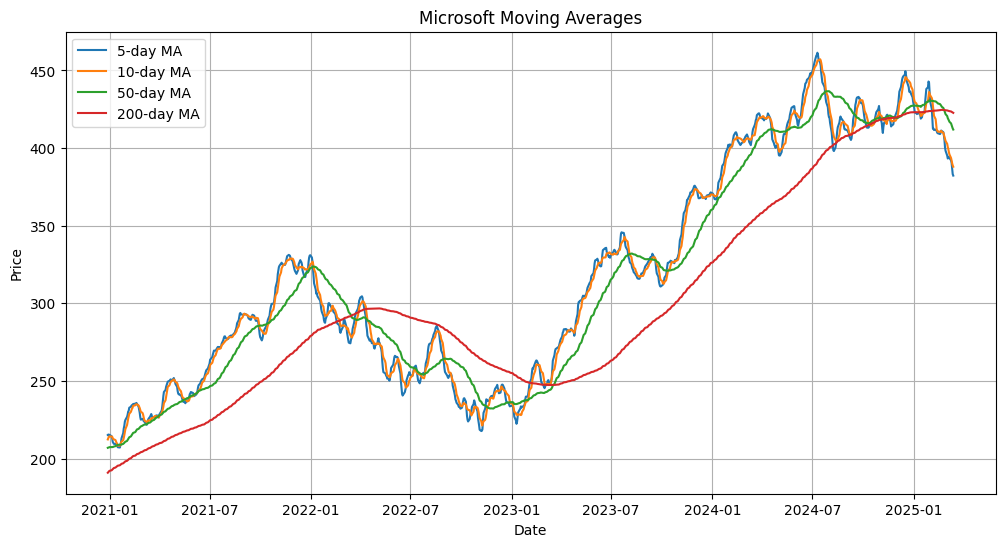

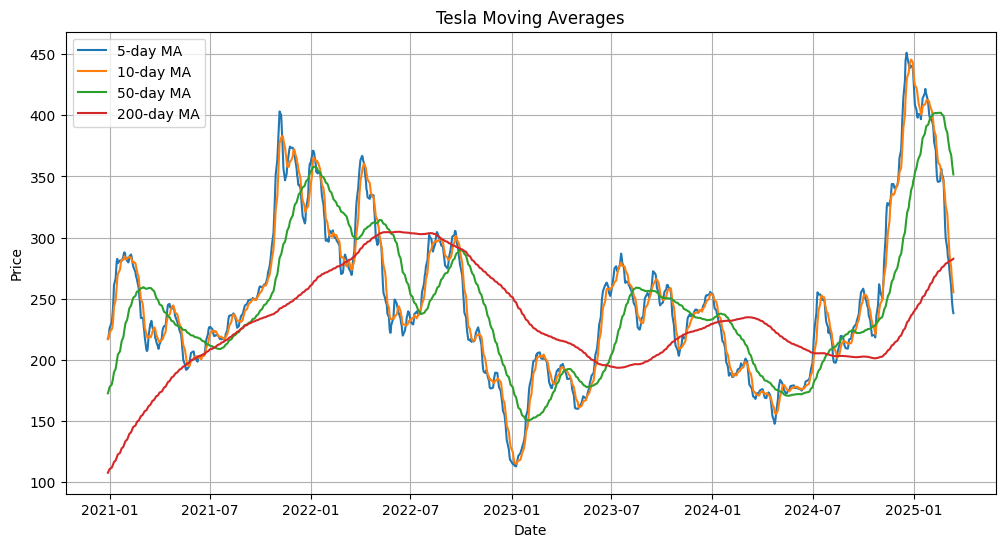

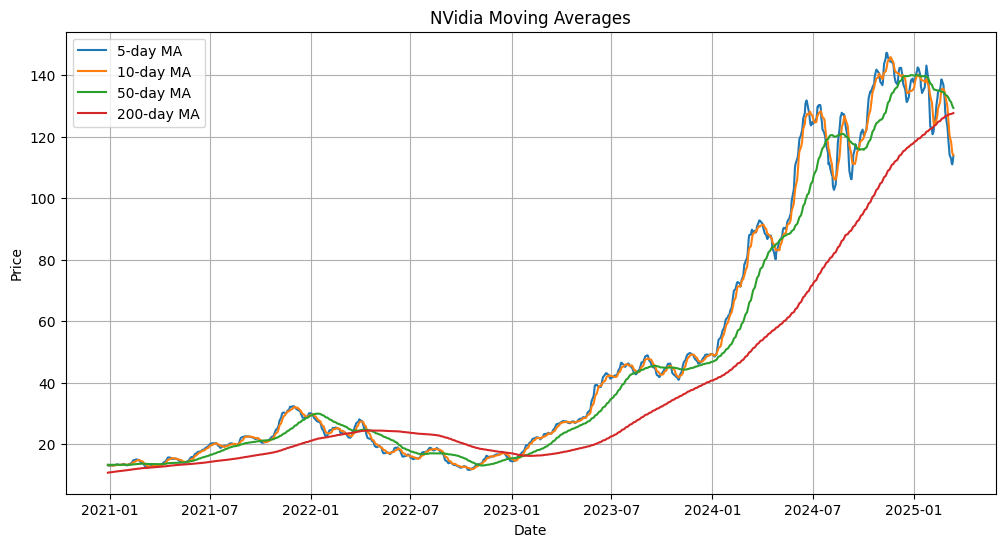

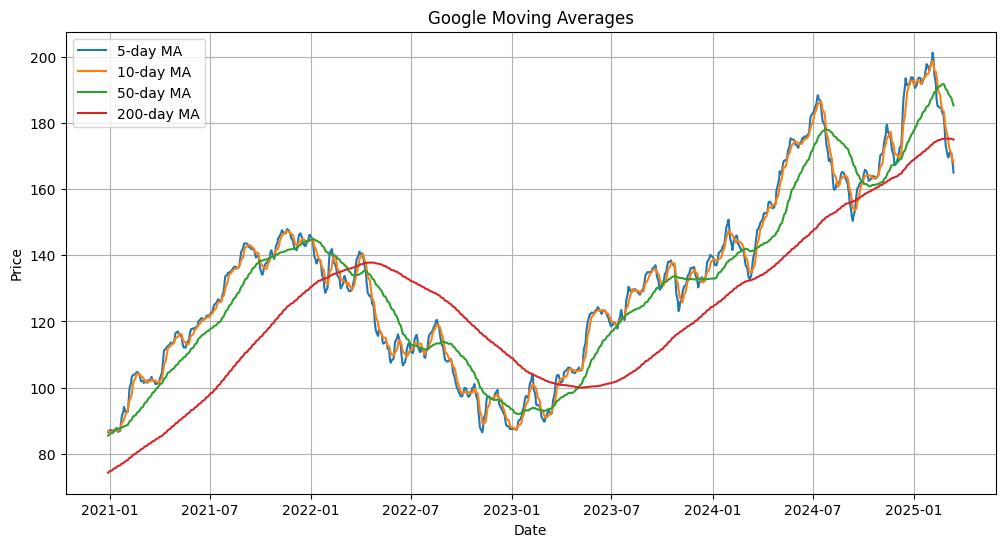

In [3]:
def show_graph(stock, stock_name):
    plt.figure(figsize=(12, 6))
    plt.plot(stock.index, stock['MA_5'], label='5-day MA')
    plt.plot(stock.index, stock['MA_10'], label='10-day MA')
    plt.plot(stock.index, stock['MA_50'], label='50-day MA')
    plt.plot(stock.index, stock['MA_200'], label='200-day MA')
    title = stock_name + " " + "Moving Averages"
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

show_graph(aapl_comb, "Apple")
show_graph(msft_comb, "Microsoft")
show_graph(tsla_comb, "Tesla")
show_graph(nvda_comb, "NVidia")
show_graph(googl_comb, "Google")

In [4]:
def daily_returns(stock):
    daily_ret = stock['Close'].pct_change().dropna()
    volatility = daily_ret.std()
    return daily_ret, volatility


In [5]:
def show_daily(returns, stock_name):
    title = stock_name + " " + "Daily Returns"
    returns.plot(title=title)
    plt.xlabel("Date")
    plt.ylabel("Return")
    plt.show()

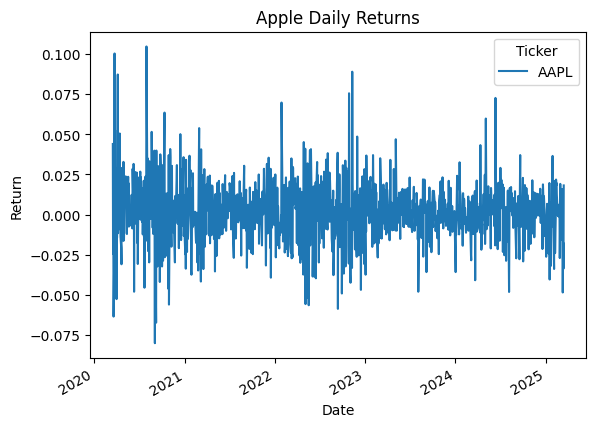

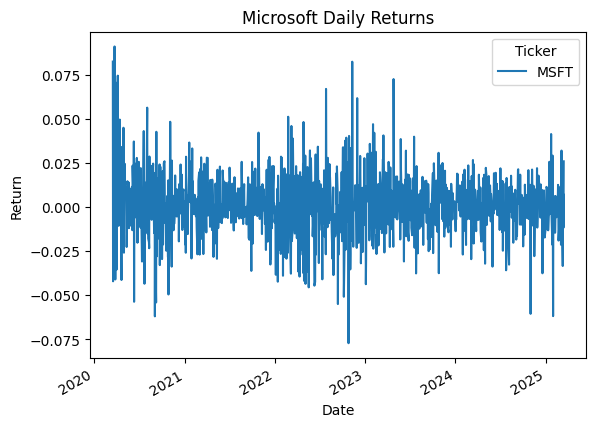

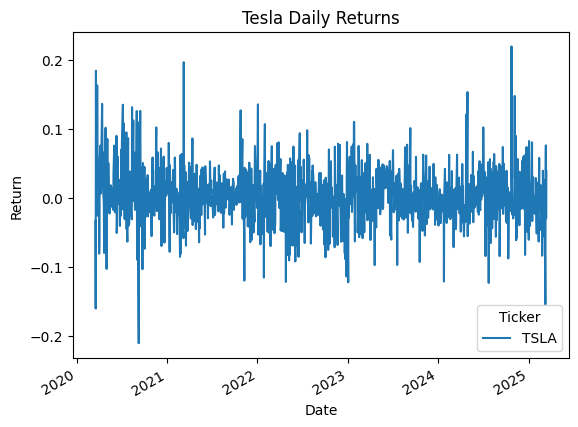

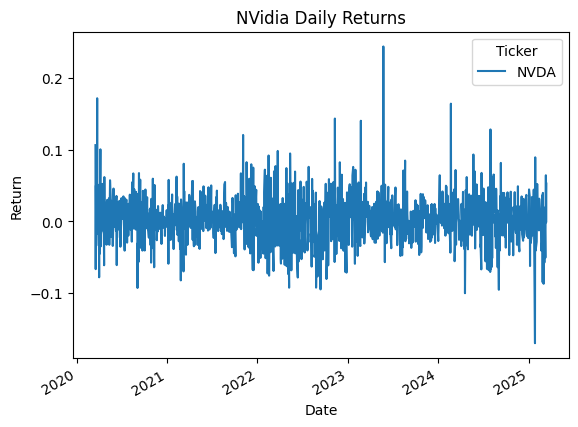

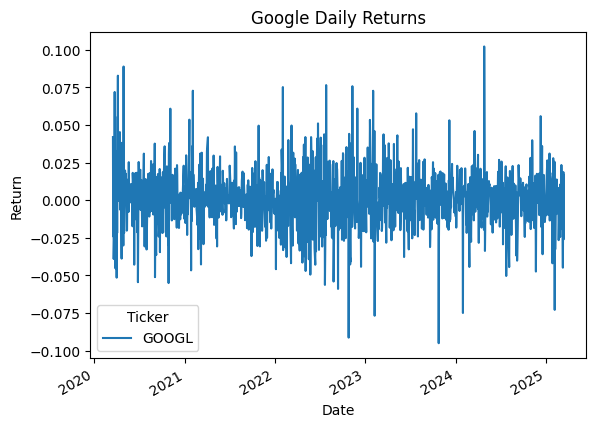

In [6]:
aapl_daily, _ = daily_returns(aapl_data)
show_daily(aapl_daily, "Apple")
msft_daily, _ = daily_returns(msft_data)
show_daily(msft_daily, "Microsoft")
tsla_daily, _ = daily_returns(tsla_data)
show_daily(tsla_daily, "Tesla")
nvda_daily, _ = daily_returns(nvda_data)
show_daily(nvda_daily, "NVidia")
googl_daily, _ = daily_returns(googl_data)
show_daily(googl_daily, "Google")

In [7]:
def rsi(stock):
    delta = stock['Close'].diff().dropna()
    
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    
    window = 14
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi.dropna()

In [8]:
def show_rsi(rsi, stock_name):
    plt.figure(figsize=(12,6))
    plt.plot(rsi, label='RSI')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    title = stock_name + " " + "RSI - Relative Strength Index"
    plt.title(title)
    plt.legend()
    plt.show()

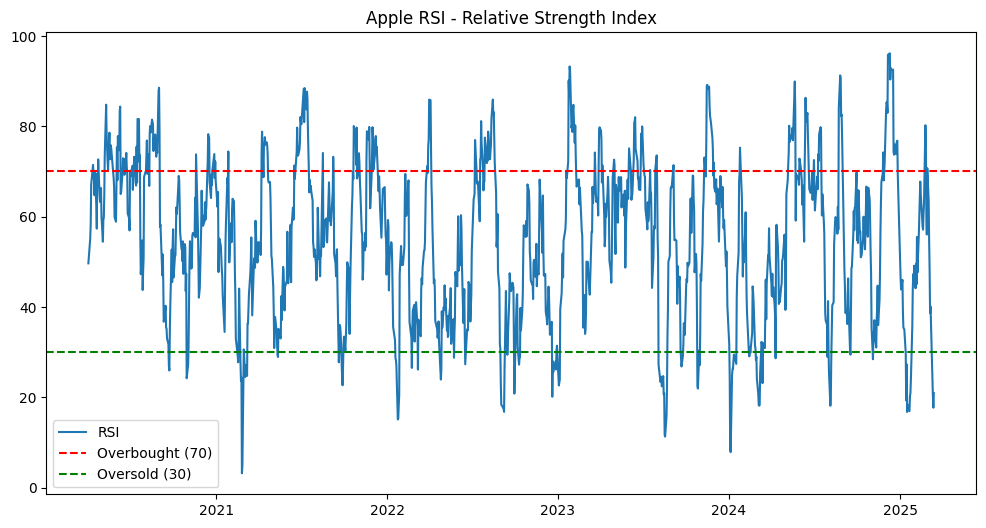

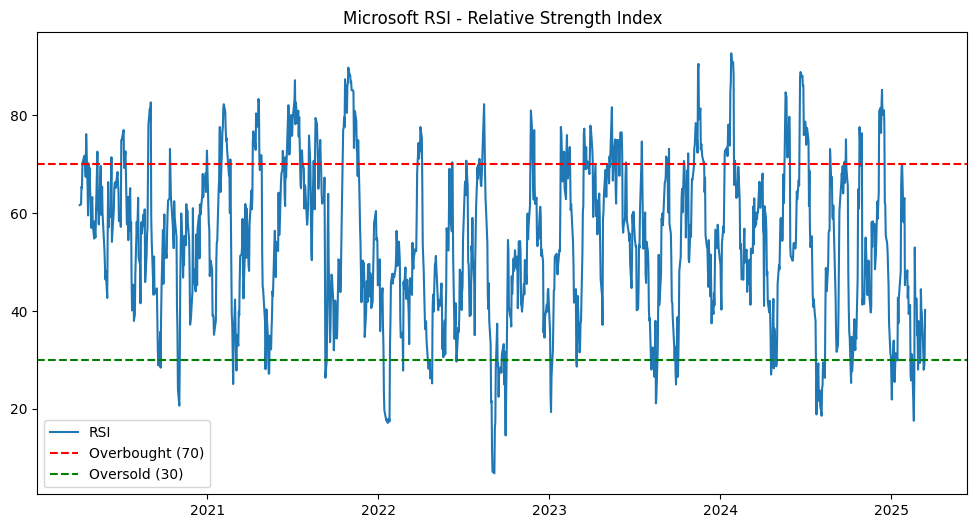

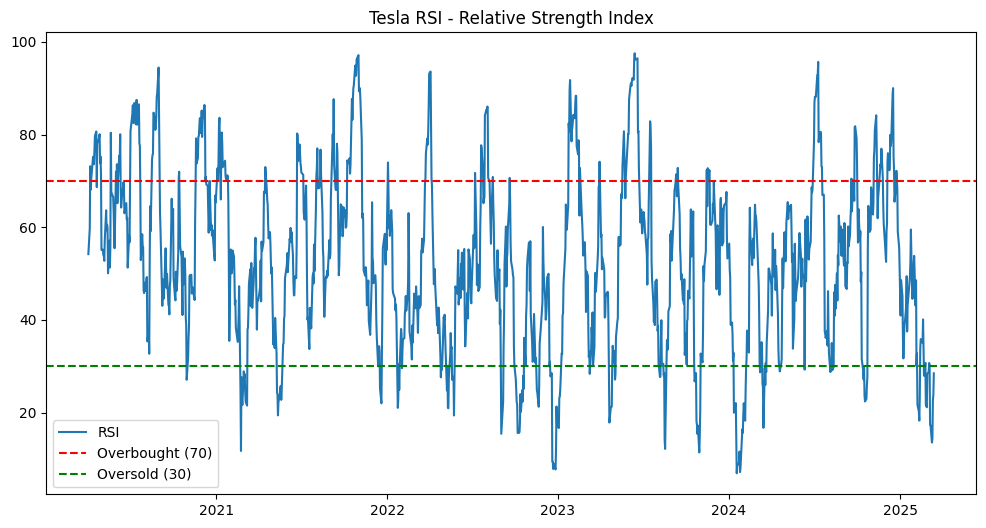

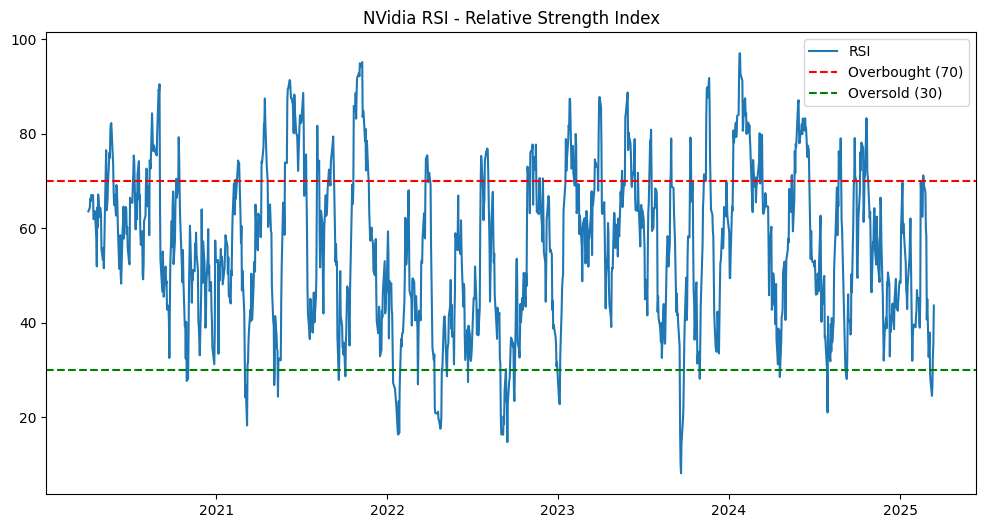

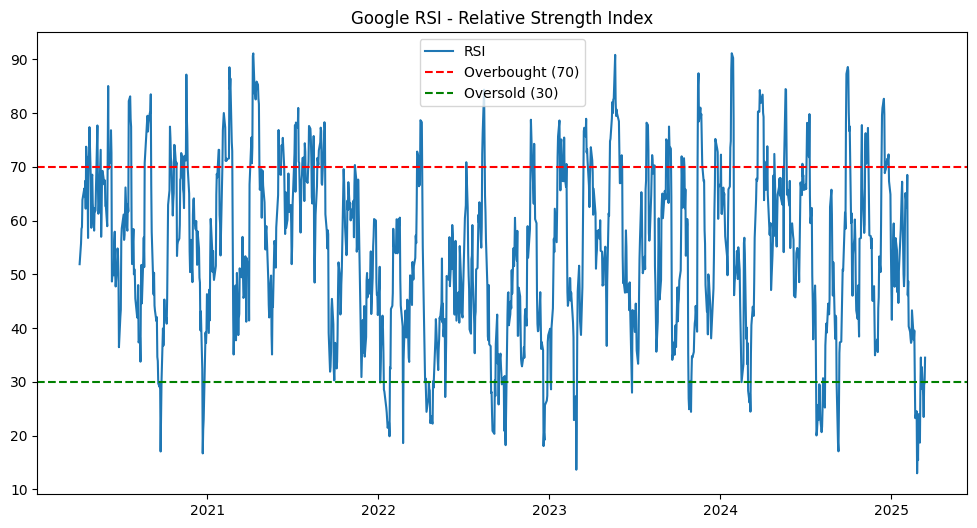

In [9]:
aapl_rsi = rsi(aapl_data)
show_rsi(aapl_rsi, "Apple")

msft_rsi = rsi(msft_data)
show_rsi(msft_rsi, "Microsoft")

tsla_rsi = rsi(tsla_data)
show_rsi(tsla_rsi, "Tesla")

nvda_rsi = rsi(nvda_data)
show_rsi(nvda_rsi, "NVidia")

googl_rsi = rsi(googl_data)
show_rsi(googl_rsi, "Google")

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import seaborn as sns

def ols_regression(stock_ma, stock_rsi, stock):
    df = pd.DataFrame(columns=['MA_10', 'rsi'])
    df['MA_10'] = stock_ma['MA_10']
    df['rsi'] = stock_rsi
    df['Close'] = stock["Close"]
    
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[['MA_10', 'rsi', 'Close']] = scaler.fit_transform(df[['MA_10', 'rsi', 'Close']])

    sns.pairplot(df_scaled)
    plt.show()
    
    X = df_scaled[['MA_10', 'rsi']]
    y = df_scaled['Close']
    
    X = X.dropna()
    y = y.loc[X.index]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Fit OLS model
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    print(model.summary())

    # Predict and evaluate on test set
    X_test_sm = sm.add_constant(X_test)
    y_pred = model.predict(X_test_sm)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nTest Set Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2:  {r2:.4f}")

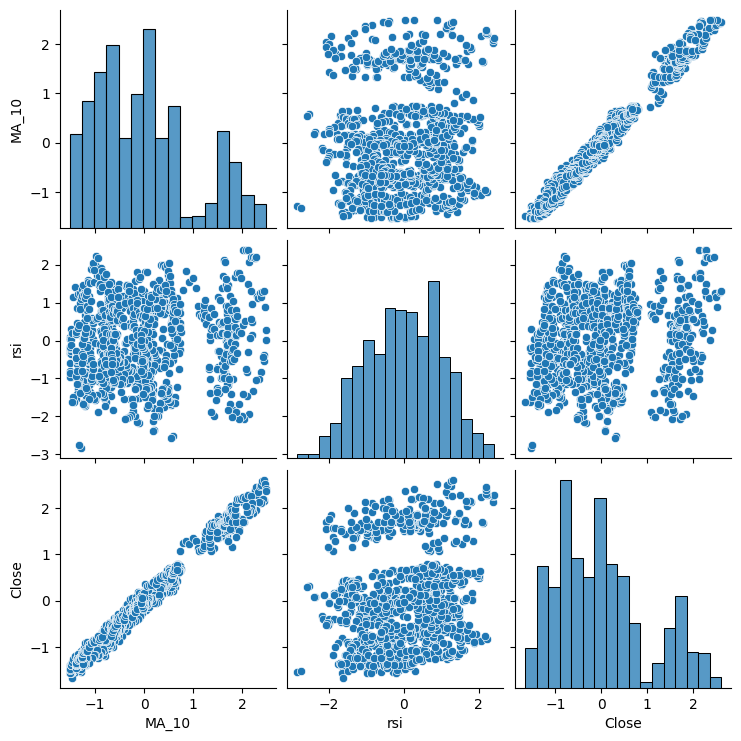

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.827e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:32:30   Log-Likelihood:                 825.02
No. Observations:                 846   AIC:                            -1644.
Df Residuals:                     843   BIC:                            -1630.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.004     -1.275      0.2

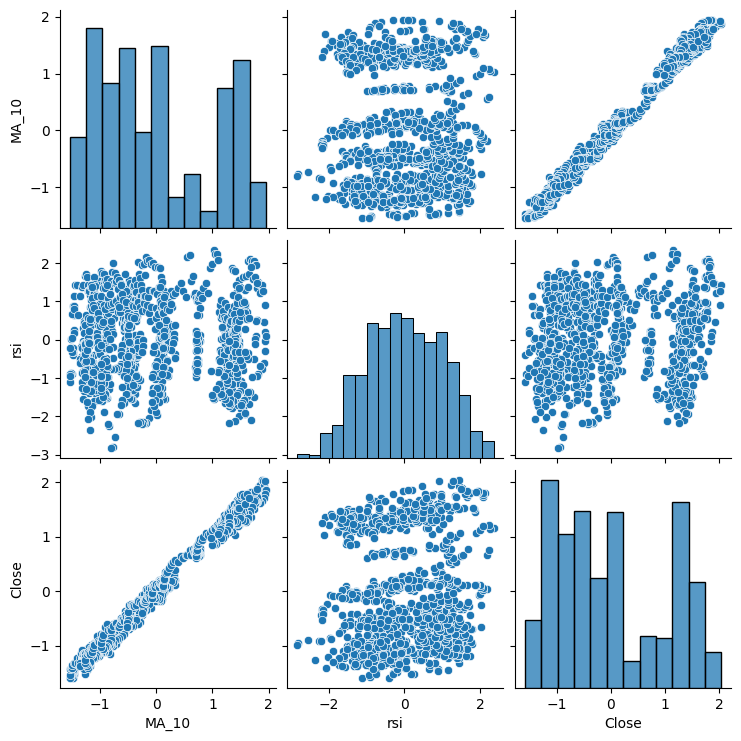

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.324e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:32:31   Log-Likelihood:                 994.78
No. Observations:                 846   AIC:                            -1984.
Df Residuals:                     843   BIC:                            -1969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.003     -0.285      0.7

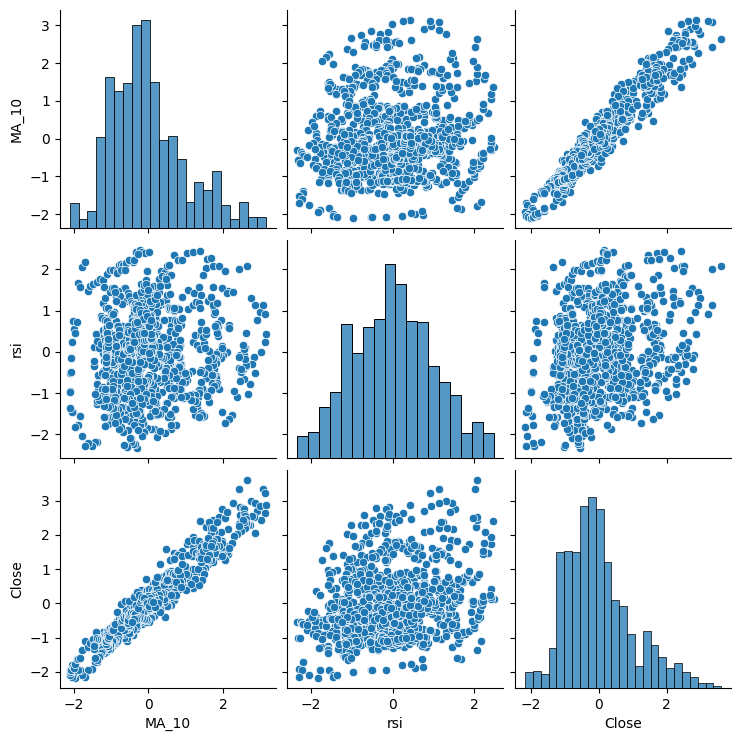

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:32:32   Log-Likelihood:                 327.06
No. Observations:                 846   AIC:                            -648.1
Df Residuals:                     843   BIC:                            -633.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.006     -0.707      0.4

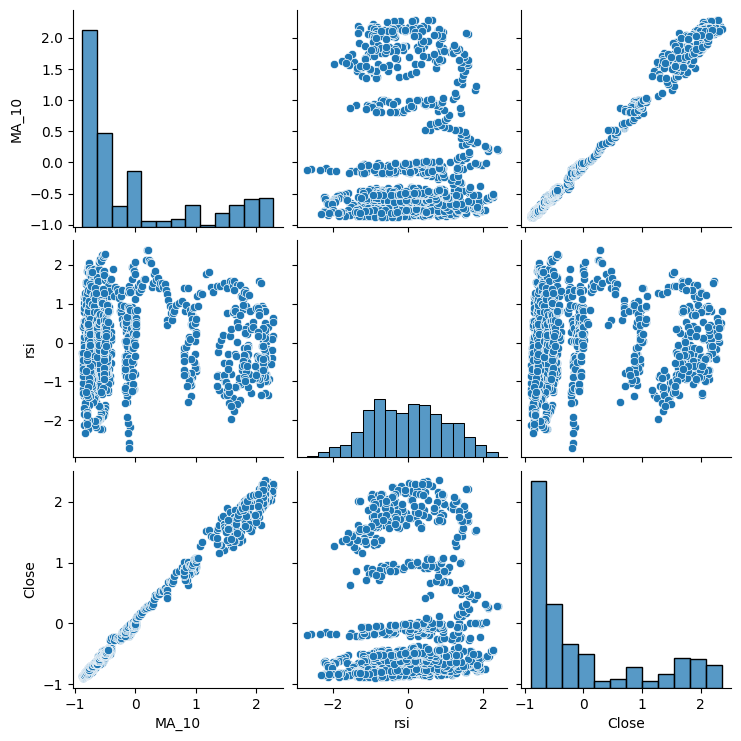

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 8.884e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:32:33   Log-Likelihood:                 1717.9
No. Observations:                 846   AIC:                            -3430.
Df Residuals:                     843   BIC:                            -3416.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.002      3.405      0.0

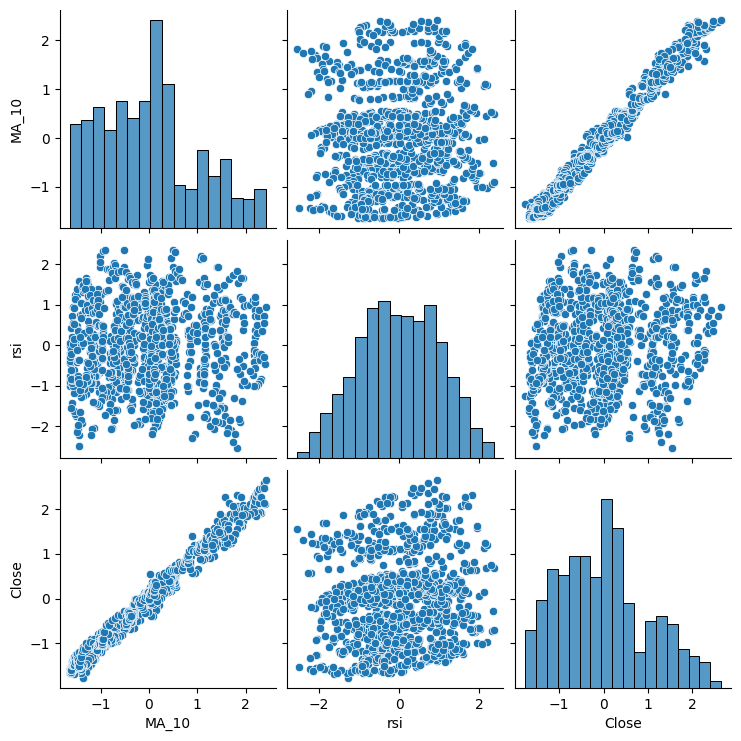

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.037e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:32:35   Log-Likelihood:                 774.52
No. Observations:                 846   AIC:                            -1543.
Df Residuals:                     843   BIC:                            -1529.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.004     -1.113      0.2

In [11]:
ols_regression(aapl_comb, aapl_rsi, aapl_data)
ols_regression(msft_comb, msft_rsi, msft_data)
ols_regression(tsla_comb, tsla_rsi, tsla_data)
ols_regression(nvda_comb, nvda_rsi, nvda_data)
ols_regression(googl_comb, googl_rsi, googl_data)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

def SVM_evaluation(stock_ma, stock_rsi, stock, stock_name):

    df = pd.DataFrame(columns=['MA_10', 'rsi'])
    df['MA_10'] = stock_ma['MA_10']
    df['rsi'] = stock_rsi
    df['Close'] = stock["Close"]
    
    features = ['MA_10', 'rsi']
    X = df[features].dropna()
    y = df['Close'].loc[X.index]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, shuffle=False
    )
    
    param_grid = {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }
    
    svr = SVR()
    grid_search = GridSearchCV(
        svr, param_grid, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_svr = grid_search.best_estimator_
    
    y_pred = best_svr.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Best Parameters:", grid_search.best_params_)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2 Score:", r2)
    
    # MSE
    cv_mse = -cross_val_score(best_svr, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    # MAE
    cv_mae = -cross_val_score(best_svr, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    # R²
    cv_r2 = cross_val_score(best_svr, X_scaled, y, cv=5, scoring='r2')
    
    print("Cross-validated MSE:", cv_mse.mean())
    print("Cross-validated MAE:", cv_mae.mean())
    print("Cross-validated R2:", cv_r2.mean())
    
    plt.figure(figsize=(10,5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    title = stock_name + " " + 'SVM Predictions vs Actual'
    plt.title(title)
    plt.legend()
    plt.show()

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
MSE: 21.810454570249227
MAE: 3.7157309986025235
R2 Score: 0.9154073919957318
Cross-validated MSE: 12.309344089046686
Cross-validated MAE: 2.6930264558859456
Cross-validated R2: 0.9143651814283473


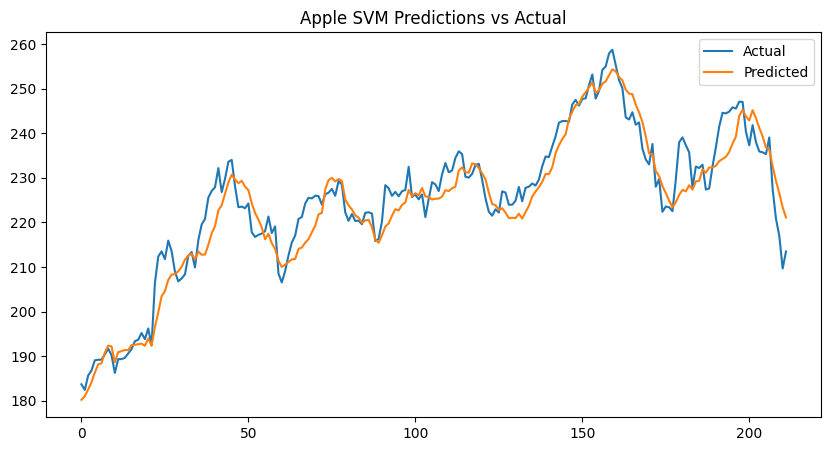

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
MSE: 54.885354925726304
MAE: 6.0658153462661835
R2 Score: 0.8010925636790586
Cross-validated MSE: 35.124365501586304
Cross-validated MAE: 4.709556831171138
Cross-validated R2: 0.9335135471719067


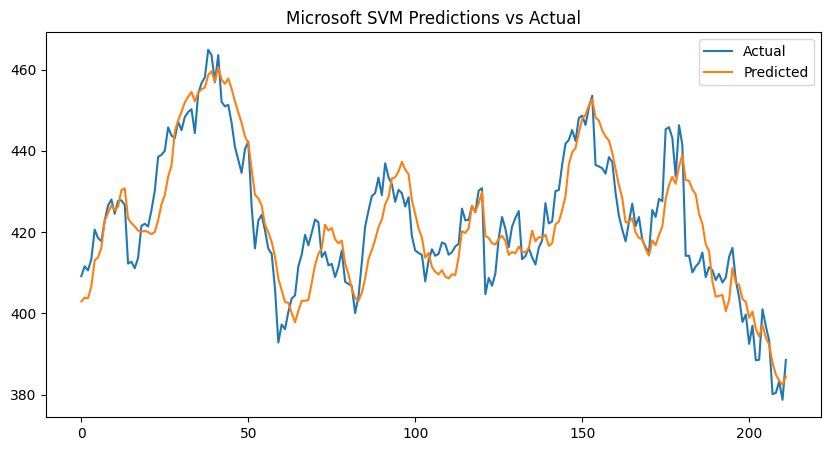

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
MSE: 236.06180604936677
MAE: 10.941127400028348
R2 Score: 0.9662619818837282
Cross-validated MSE: 139.94808377495494
Cross-validated MAE: 8.613905948287915
Cross-validated R2: 0.9385148451235772


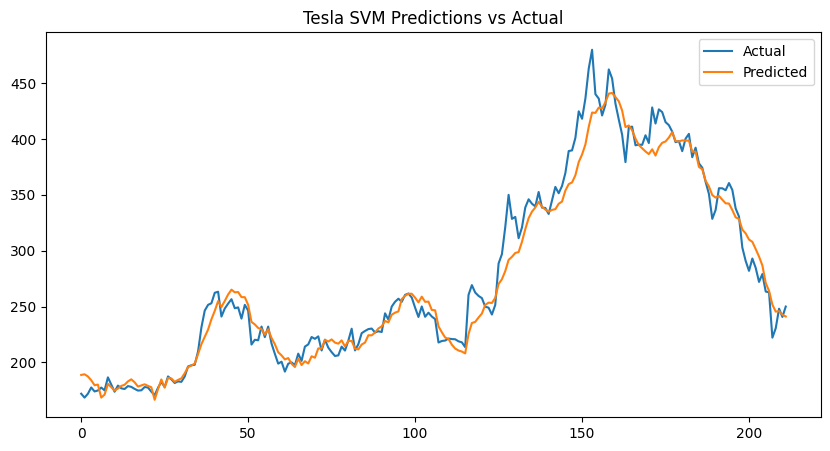

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
MSE: 41.81123526234188
MAE: 5.211941920533201
R2 Score: 0.7798833323964576
Cross-validated MSE: 10.011994655321645
Cross-validated MAE: 1.8591477907509286
Cross-validated R2: 0.9273883834064994


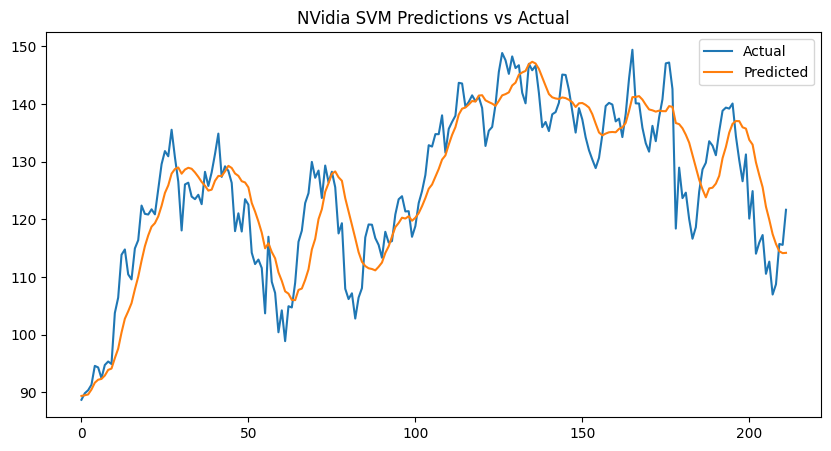

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
MSE: 14.148680974780312
MAE: 2.8550374708007538
R2 Score: 0.9057939907590754
Cross-validated MSE: 8.765364278528592
Cross-validated MAE: 2.278208155607947
Cross-validated R2: 0.9421177045530831


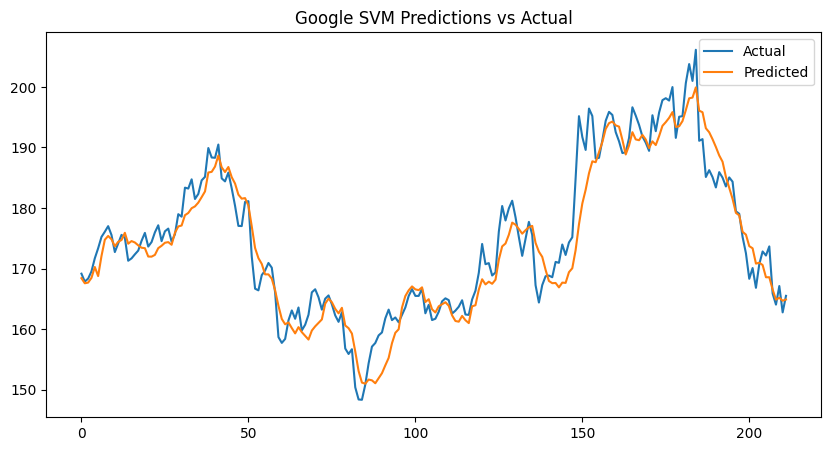

In [13]:
SVM_evaluation(aapl_comb, aapl_rsi, aapl_data, "Apple")
SVM_evaluation(msft_comb, msft_rsi, msft_data, "Microsoft")
SVM_evaluation(tsla_comb, tsla_rsi, tsla_data, "Tesla")
SVM_evaluation(nvda_comb, nvda_rsi, nvda_data, "NVidia")
SVM_evaluation(googl_comb, googl_rsi, googl_data, "Google")

In [14]:
def train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 2):
    dtr = DecisionTreeRegressor(max_depth = max_depth)
    dtr.fit(X_train,Y_train)
    Y_train_pred = dtr.predict(X_train)
    r2 = r2_score(Y_train, Y_train_pred)
    Y_test_pred = dtr.predict(X_test)
    r2_test = r2_score(Y_test, Y_test_pred)
    print("R Squared on train data: ", r2)
    print("R Squared on test data: ", r2_test)
    features = list(X.columns)
    plt.figure(figsize=[20,14])
    tree.plot_tree(dtr, feature_names=features, filled=True)
    plt.show()

In [15]:
def relative_strength_index(stock, w):
    delta = stock['Close'].diff().dropna()
    
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    
    window = w
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi.dropna()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

def random_forest_evaluation(stock_ma, stock_rsi, stock_volatility, stock, stock_name):

    df = pd.DataFrame(columns=['MA_3', 'MA_6', 'MA_9', 'MA_12', 'rsi_3', 'rsi_6', 'rsi_9', 'rsi_12', 'vol', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6'])
    
    df['MA_3'] = stock_ma['MA_3']
    df['MA_6'] = stock_ma['MA_6']
    df['MA_9'] = stock_ma['MA_9']
    df['MA_12'] = stock_ma['MA_12']

    df['Close_lag1'] = stock['Close'].shift(1)
    df['Close_lag2'] = stock['Close'].shift(2)
    df['Close_lag3'] = stock['Close'].shift(3)
    df['Close_lag4'] = stock['Close'].shift(4)
    df['Close_lag5'] = stock['Close'].shift(5)
    df['Close_lag6'] = stock['Close'].shift(6)
    
    df['rsi_3'] = relative_strength_index(stock, 3)
    df['rsi_6'] = relative_strength_index(stock, 6)
    df['rsi_9'] = relative_strength_index(stock, 9)
    df['rsi_12'] = relative_strength_index(stock, 12)
    
    df['vol'] = stock_volatility
    df['Close'] = stock["Close"]
    
    features = ['MA_3', 'MA_6', 'MA_9', 'MA_12', 'rsi_3', 'rsi_6', 'rsi_9', 'rsi_12', 'vol', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6']
    X = df[features].dropna()
    y = df['Close'].loc[X.index]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # print(X_scaled)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, random_state=42, test_size=0.2
    )

    rf = RandomForestRegressor(random_state=100,oob_score=True,max_features='sqrt')
    
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2 Score:", r2)

    # MSE (negated, so we reverse the sign)
    cv_mse = -cross_val_score(rf, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    cv_mae = -cross_val_score(rf, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    cv_r2 = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')
    
    print("Cross-validated MSE:", cv_mse.mean())
    print("Cross-validated MAE:", cv_mae.mean())
    print("Cross-validated R2:", cv_r2.mean())

    importances = rf.feature_importances_
    feature_names = features
    
    # Sort by importance
    sorted_idx = np.argsort(importances)
    
    plt.figure(figsize=(8, 5))
    plt.barh(range(len(importances)), importances[sorted_idx], align='center')
    plt.yticks(range(len(importances)), np.array(feature_names)[sorted_idx])
    title = stock_name + " " + "Feature Importances (Random Forest)"
    plt.title(title)
    plt.xlabel("Importance")
    plt.show()

MSE: 3.4409057353543364
MAE: 1.2785805745394718
R2 Score: 0.9967640774063451
Cross-validated MSE: 249.93667195191475
Cross-validated MAE: 7.876360920127046
Cross-validated R2: -0.03639471722706613


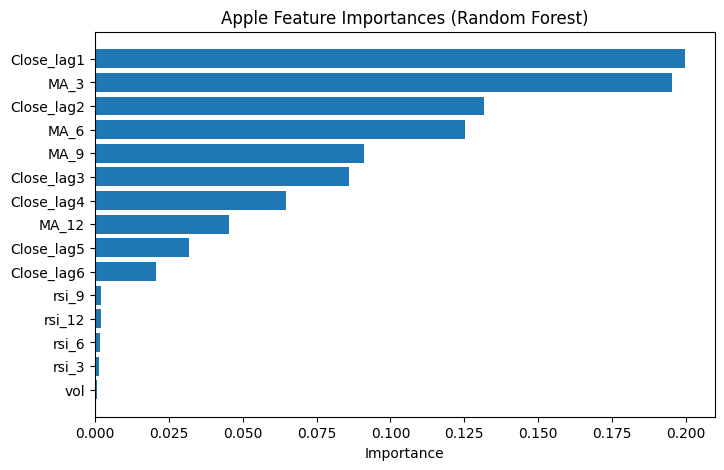

MSE: 9.768297785459826
MAE: 2.2613052555300164
R2 Score: 0.9980482856600983
Cross-validated MSE: 60.355082249097634
Cross-validated MAE: 4.755040228808809
Cross-validated R2: 0.8477937684112575


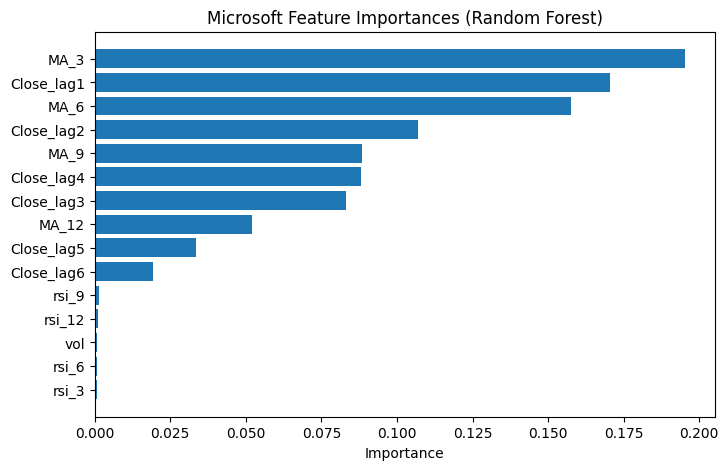

MSE: 42.39928201896959
MAE: 4.160585563227817
R2 Score: 0.988262758053925
Cross-validated MSE: 136.64545259979894
Cross-validated MAE: 6.0774749950268045
Cross-validated R2: 0.960454610056772


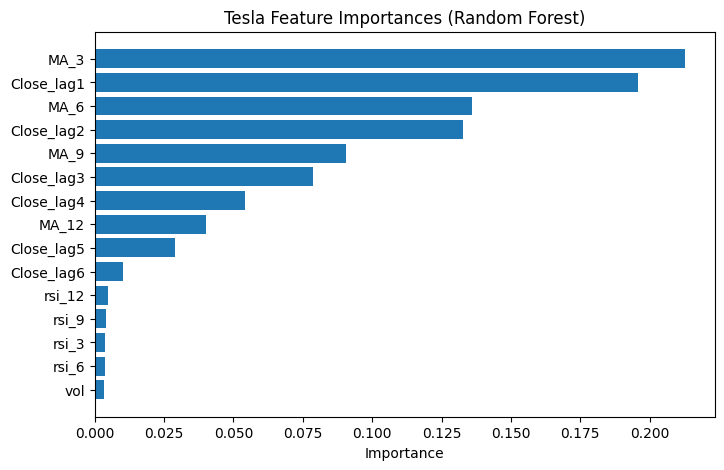

MSE: 1.6160792666094295
MAE: 0.7224152813317638
R2 Score: 0.9990352701647721
Cross-validated MSE: 296.9101638944772
Cross-validated MAE: 8.693739753643026
Cross-validated R2: -0.5970647510865745


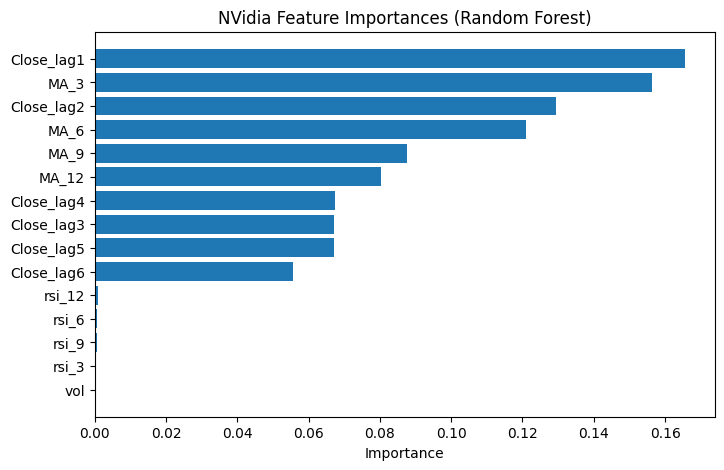

MSE: 3.3094791312581493
MAE: 1.1849483669928782
R2 Score: 0.9955424898881046
Cross-validated MSE: 44.07903653211989
Cross-validated MAE: 3.2294009670539667
Cross-validated R2: 0.7055611268795363


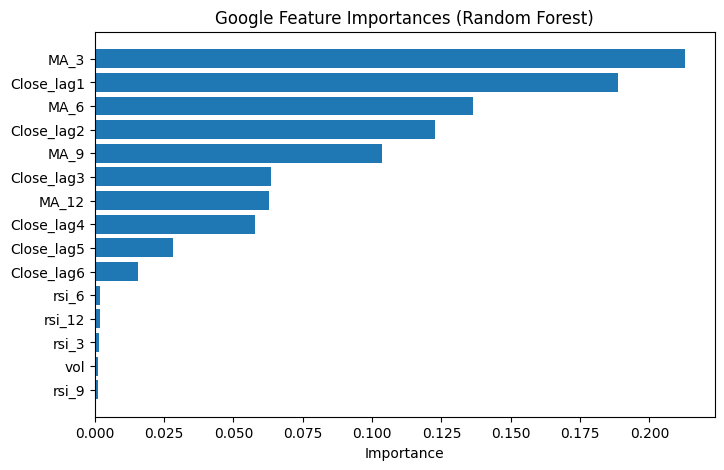

In [17]:
random_forest_evaluation(aapl_comb, aapl_rsi, aapl_daily, aapl_data, "Apple")
random_forest_evaluation(msft_comb, msft_rsi, msft_daily, msft_data, "Microsoft")
random_forest_evaluation(tsla_comb, tsla_rsi, tsla_daily, tsla_data, "Tesla")
random_forest_evaluation(nvda_comb, nvda_rsi, nvda_daily, nvda_data, "NVidia")
random_forest_evaluation(googl_comb, googl_rsi, googl_daily, googl_data, "Google")

In [18]:
# def num_steps(length: int, batch_size: int):
#     return length//batch_size + 1

In [19]:
# p = {'lr': (0.1,0.5,10),
#      'first_neuron':[10, 20],
#      'hidden_layers':[1, 2, 3],
#      'batch_size': (10,30,5),
#      'epochs': [500],
#      'dropout': (0, 0.5, 5),
#      'shapes':['brick','funnel'],
#      'activation': ['relu']
#     }

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

def stock_predictor_model(x_train):
    '''
    Define the stock predictor model
    '''
    stock_predictor = None
    stock_predictor = Sequential()
    # One Dense layer with number of units same as features
    stock_predictor.add(Dense(10, input_dim=x_train.shape[1],
                    activation='linear',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(6, input_dim=10,
                    activation='linear',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(3, input_dim=6,
                activation='linear',
                kernel_initializer='he_normal'))
    # Final dense layer
    stock_predictor.add(Dense(1, activation='linear',
                    kernel_initializer='he_normal'))
    # Using mse as loss and mape as the metric
    stock_predictor.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['mape'])
    return stock_predictor

In [21]:
def show_graph_prediction(y_pred, y_test):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title("Stock Price Prediction")
    plt.legend()
    plt.show()

In [22]:
def final_output(stock_ma, stock_rsi, stock_volatility, stock, stock_name):
    df = pd.DataFrame(columns=['MA_3', 'MA_6', 'MA_9', 'MA_12', 'rsi_3', 'rsi_6', 'rsi_9', 'rsi_12', 'vol', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6'])
    
    df['MA_3'] = stock_ma['MA_3']
    df['MA_6'] = stock_ma['MA_6']
    df['MA_9'] = stock_ma['MA_9']
    df['MA_12'] = stock_ma['MA_12']

    df['Close_lag1'] = stock['Close'].shift(1)
    df['Close_lag2'] = stock['Close'].shift(2)
    df['Close_lag3'] = stock['Close'].shift(3)
    df['Close_lag4'] = stock['Close'].shift(4)
    df['Close_lag5'] = stock['Close'].shift(5)
    df['Close_lag6'] = stock['Close'].shift(6)
    
    df['rsi_3'] = relative_strength_index(stock, 3)
    df['rsi_6'] = relative_strength_index(stock, 6)
    df['rsi_9'] = relative_strength_index(stock, 9)
    df['rsi_12'] = relative_strength_index(stock, 12)
    
    df['vol'] = stock_volatility
    df['Close'] = stock["Close"]

    df = df.reset_index(drop=True)
    
    features = ['MA_3', 'MA_6', 'MA_9', 'MA_12', 'rsi_3', 'rsi_6', 'rsi_9', 'rsi_12', 'vol', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6']
    X = df[features].dropna()
    y = df['Close'].loc[X.index]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    y = y.values.reshape(-1, 1)  # make it 2D for scaler
    y_scaler = StandardScaler()
    y_scaled = y_scaler.fit_transform(y)

    return X_scaled, y_scaled

In [23]:
x_scaled, y_scaled = final_output(aapl_comb, aapl_rsi, aapl_daily, aapl_data, "Apple")

# print("x_scaled")
# print(x_scaled)
# print(x_scaled.shape)
# print("y_scaled")
# print(y_scaled)
# print(y_scaled.shape)

In [24]:
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=100)

X_val, X_test, y_val_scaled, y_test_scaled = train_test_split(X_test, y_test_scaled, test_size=0.5, random_state=100)

In [25]:
def num_steps(length: int, batch_size: int):
    return length//batch_size + 1

In [26]:
batch_size = 10
num_steps(len(X_train), batch_size)

85

In [27]:
model = stock_predictor_model(X_train)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                160       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history = model.fit(X_train, y_train_scaled, 
                    validation_data=[X_val, y_val_scaled],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

Epoch 1/1000
85/85 [==============================] - 1s 3ms/step - loss: 1.7483 - mape: 389.7061 - val_loss: 0.0474 - val_mape: 76.1248
Epoch 2/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0183 - mape: 105.0335 - val_loss: 0.0132 - val_mape: 30.1800
Epoch 3/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0098 - mape: 80.8249 - val_loss: 0.0159 - val_mape: 32.5518
Epoch 4/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0091 - mape: 65.5323 - val_loss: 0.0037 - val_mape: 16.7272
Epoch 5/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0078 - mape: 63.0469 - val_loss: 0.0061 - val_mape: 17.1178
Epoch 6/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0071 - mape: 57.5792 - val_loss: 0.0038 - val_mape: 13.4970
Epoch 7/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0061 - mape: 60.2088 - val_loss: 0.0024 - val_mape: 10.8566
Epoch 8/1000
85/85 [==========================

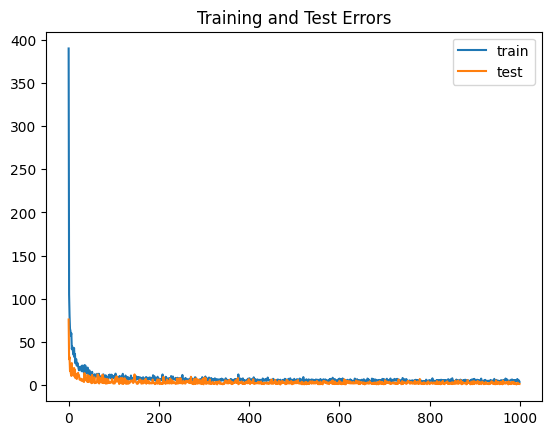

In [30]:
# plot training history
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

In [31]:
import numpy as np
from sklearn.utils import check_array

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    measures mape score
    """
    # print(y_pred)
    # print(y_true)

#     y_true, y_pred = check_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
y_pred_scaled = model.predict(X_test)
mean_absolute_percentage_error(y_test_scaled, y_pred_scaled)

4/4 [==============================] - 0s 1ms/step


4.07948595673469

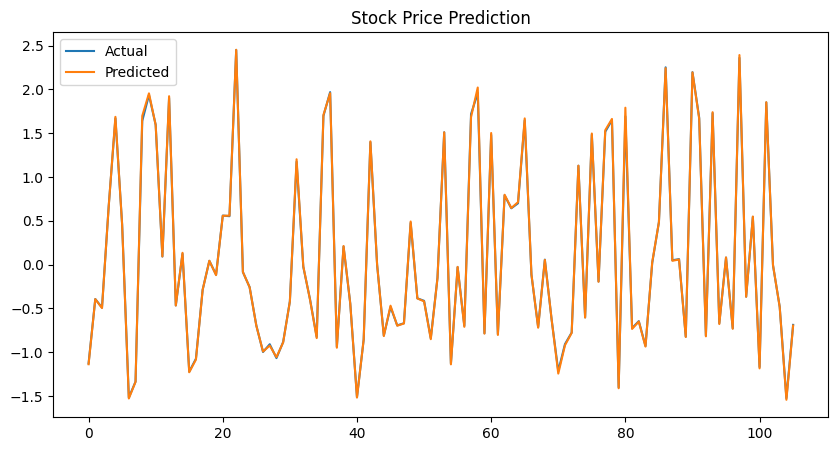

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

In [34]:
x_scaled, y_scaled = final_output(msft_comb, msft_rsi, msft_daily, msft_data, "Microsoft")

In [35]:
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=100)

X_val, X_test, y_val_scaled, y_test_scaled = train_test_split(X_test, y_test_scaled, test_size=0.5, random_state=100)

In [36]:
batch_size = 10
num_steps(len(X_train), batch_size)

85

In [37]:
model = stock_predictor_model(X_train)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                160       
                                                                 
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
 dense_6 (Dense)             (None, 3)                 21        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train_scaled, 
                    validation_data=[X_val, y_val_scaled],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

Epoch 1/1000
85/85 [==============================] - 1s 2ms/step - loss: 0.4923 - mape: 337.4261 - val_loss: 0.0765 - val_mape: 87.1430
Epoch 2/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0497 - mape: 97.1423 - val_loss: 0.0318 - val_mape: 59.8692
Epoch 3/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0349 - mape: 62.9998 - val_loss: 0.0271 - val_mape: 56.3519
Epoch 4/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0295 - mape: 71.6278 - val_loss: 0.0231 - val_mape: 49.1181
Epoch 5/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0255 - mape: 76.6655 - val_loss: 0.0258 - val_mape: 51.9728
Epoch 6/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0231 - mape: 57.5635 - val_loss: 0.0160 - val_mape: 41.6484
Epoch 7/1000
85/85 [==============================] - 0s 1ms/step - loss: 0.0213 - mape: 54.1902 - val_loss: 0.0151 - val_mape: 42.4825
Epoch 8/1000
85/85 [===========================

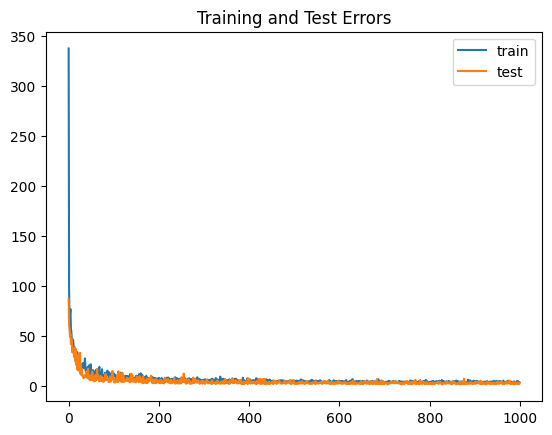

In [40]:
# plot training history
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

In [41]:
y_pred_scaled = model.predict(X_test)
mean_absolute_percentage_error(y_test_scaled, y_pred_scaled)

4/4 [==============================] - 0s 2ms/step


1.7683839597769095

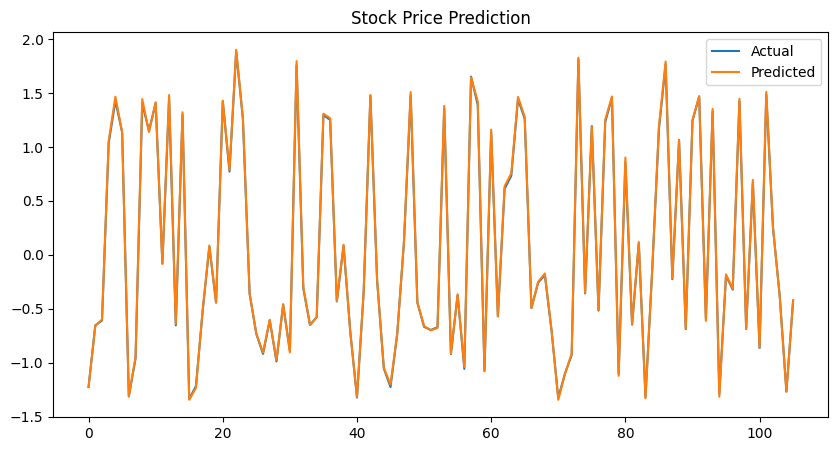

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                160       
                                                                 
 dense_9 (Dense)             (None, 6)                 66        
                                                                 
 dense_10 (Dense)            (None, 3)                 21        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
85/85 [==============================] - 1s 2ms/step - loss: 0.2884 - mape: 152.7497 - val_loss: 0.0609 - val_mape: 47.2125
Epoch 2/1

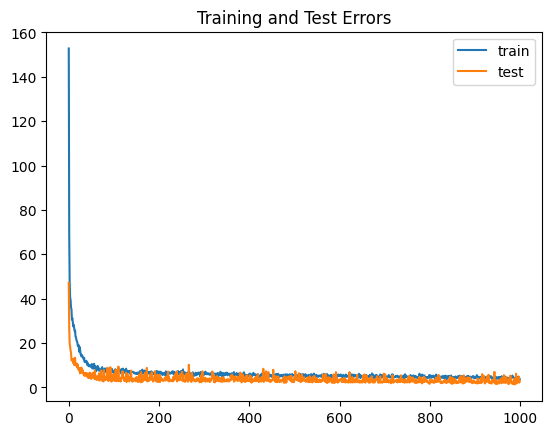

4/4 [==============================] - 0s 997us/step
5.588454927166257


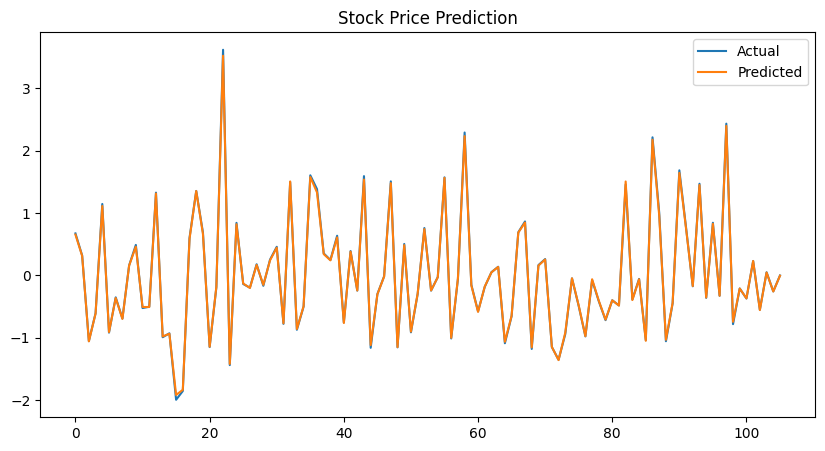

In [43]:
x_scaled, y_scaled = final_output(tsla_comb, tsla_rsi, tsla_daily, tsla_data, "Tesla")

X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=100)

X_val, X_test, y_val_scaled, y_test_scaled = train_test_split(X_test, y_test_scaled, test_size=0.5, random_state=100)

batch_size = 10
num_steps(len(X_train), batch_size)

model = stock_predictor_model(X_train)

model.summary()

history = model.fit(X_train, y_train_scaled, 
                    validation_data=[X_val, y_val_scaled],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

# plot training history
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

y_pred_scaled = model.predict(X_test)
print(mean_absolute_percentage_error(y_test_scaled, y_pred_scaled))

plt.figure(figsize=(10, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                160       
                                                                 
 dense_13 (Dense)            (None, 6)                 66        
                                                                 
 dense_14 (Dense)            (None, 3)                 21        
                                                                 
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
85/85 [==============================] - 1s 2ms/step - loss: 1.1858 - mape: 280.2070 - val_loss: 0.0271 - val_mape: 44.8457
Epoch 2/1

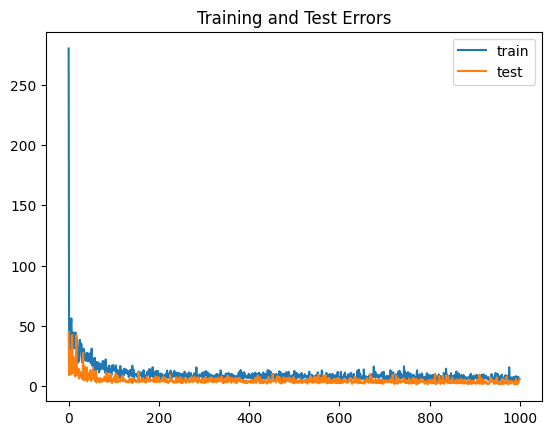

4/4 [==============================] - 0s 1ms/step
9.958013613148479


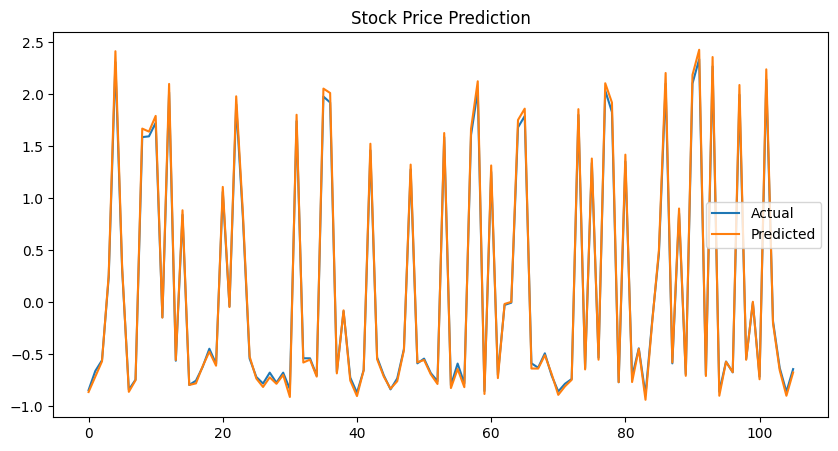

In [44]:
x_scaled, y_scaled = final_output(nvda_comb, nvda_rsi, nvda_daily, nvda_data, "NVidia")

X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=100)

X_val, X_test, y_val_scaled, y_test_scaled = train_test_split(X_test, y_test_scaled, test_size=0.5, random_state=100)

batch_size = 10
num_steps(len(X_train), batch_size)

model = stock_predictor_model(X_train)

model.summary()

history = model.fit(X_train, y_train_scaled, 
                    validation_data=[X_val, y_val_scaled],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

# plot training history
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

y_pred_scaled = model.predict(X_test)
print(mean_absolute_percentage_error(y_test_scaled, y_pred_scaled))

plt.figure(figsize=(10, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                160       
                                                                 
 dense_17 (Dense)            (None, 6)                 66        
                                                                 
 dense_18 (Dense)            (None, 3)                 21        
                                                                 
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
85/85 [==============================] - 1s 2ms/step - loss: 1.8185 - mape: 139.6004 - val_loss: 0.0148 - val_mape: 25.7040
Epoch 2/1

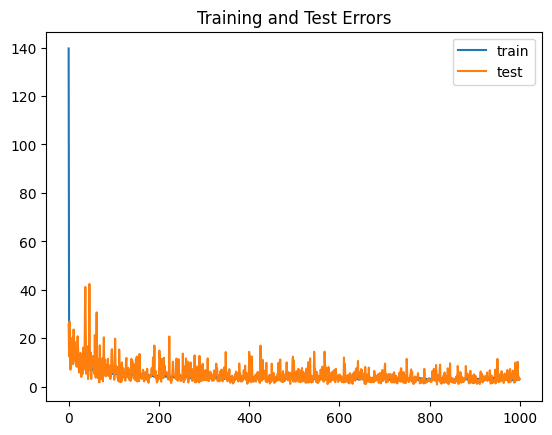

4/4 [==============================] - 0s 1ms/step
4.03047132735063


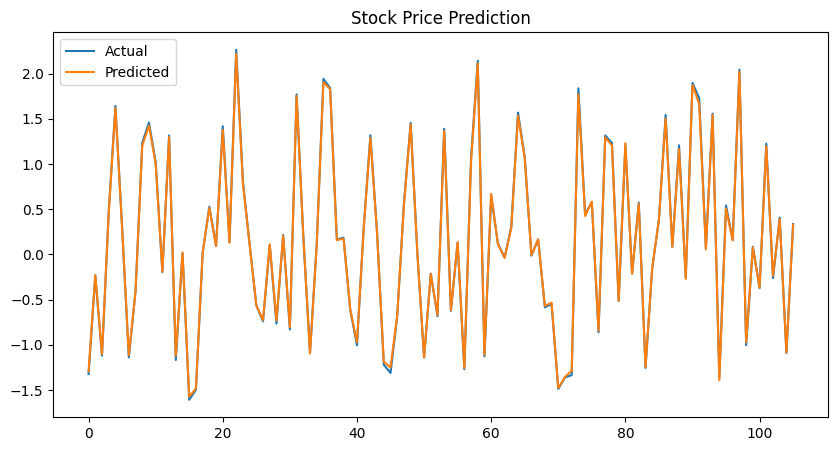

In [45]:
x_scaled, y_scaled = final_output(googl_comb, googl_rsi, googl_daily, googl_data, "Google")

X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=100)

X_val, X_test, y_val_scaled, y_test_scaled = train_test_split(X_test, y_test_scaled, test_size=0.5, random_state=100)

batch_size = 10
num_steps(len(X_train), batch_size)

model = stock_predictor_model(X_train)

model.summary()

history = model.fit(X_train, y_train_scaled, 
                    validation_data=[X_val, y_val_scaled],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

# plot training history
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

y_pred_scaled = model.predict(X_test)
print(mean_absolute_percentage_error(y_test_scaled, y_pred_scaled))

plt.figure(figsize=(10, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()